<Dumb> Samples: 3040, scores: [0.6123366491885789, 0.6279305703364311, 0.680125053363204]

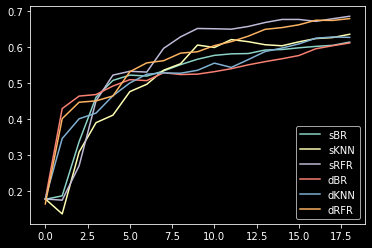

In [3]:
# Standard Libraries
from os import path
from pathlib import Path
from pprint import pprint

# External Libraries
import matplotlib.pylab as mlt
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge as BR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import RandomForestRegressor as RFR
import statistics as stats

# Custom Libraries
from modules.shared.custom import split, getPI


# Just getting datasets
_path = "/home/rjb255/University/researchProject/PurePython"
dataRoute = path.normpath(path.join(_path, '..', 'data', 'chembl', 'Additional_datasets'))
dataSets = [pd.read_csv(path.join(dataRoute, 'data_CHEMBL313.csv')),
            pd.read_csv(path.join(dataRoute, 'data_CHEMBL2637.csv')),
            pd.read_csv(path.join(dataRoute, 'data_CHEMBL4124.csv'))]
data = dataSets[0].sample(frac=1)

# Splitting up the data
X_known, Y_known, X_unknown, Y_unknown, X_test, Y_test = split(data, 160)

# Each testing stage can test 160 cases and up to 2000 samples will be tested
testSize = 160
maxSamples = len(Y_unknown)

# models to be used and pre-defining variables
models = [BR(), KNN(), RFR()]
predicitions: list
scores: list
smartScores = []
dumbScores = []
for i in range(0, maxSamples, testSize):
    predictions = []
    scores = []
    for model in models:
        m = model.fit(X_known, Y_known)
        predictions.append(m.predict(X_unknown))
        scores.append(m.score(X_test, Y_test))
    np_predictions = np.array(predictions)
    stdd = np.std(np_predictions, axis=0, ddof=1)
    index = np.argsort(-1*stdd)
    index2 = X_unknown.iloc[index].index
    print(f"\r<Smart> Samples: { len(Y_known) }, scores: {scores}", end="")
    X_known, Y_known, X_unknown, Y_unknown = getPI((X_known, Y_known), (X_unknown, Y_unknown), index2[:testSize])   
    smartScores.append(scores)

for i in range(0, maxSamples, testSize):
    X_known, Y_known, _, _, _, _ = split(data, testSize + i)
    scores = []
    for model in models:
            m = model.fit(X_known, Y_known)
            scores.append(m.score(X_test, Y_test))
    dumbScores.append(scores)
    print(f"\r<Dumb> Samples: { len(Y_known) }, scores: {scores}", end="")


mlt.plot(smartScores)
mlt.plot(dumbScores)

mlt.legend(['sBR', 'sKNN', 'sRFR', 'dBR', 'dKNN', 'dRFR'])

Samples: 3040, scores: [0.6123366491885789, 0.6279305703364311, 0.6734352071213621]

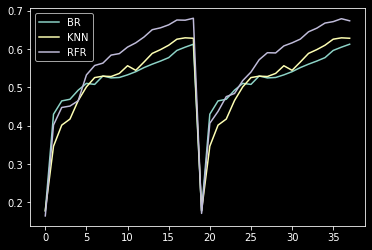

In [4]:
for i in range(0, maxSamples, testSize):
    X_known, Y_known, _, _, _, _ = split(data, testSize + i)
    scores = []
    for model in models:
            m = model.fit(X_known, Y_known)
            scores.append(m.score(X_test, Y_test))
    dumbScores.append(scores)
    print(f"\rSamples: { len(Y_known) }, scores: {scores}", end="")
mlt.plot(dumbScores)
mlt.legend(['BR', 'KNN', 'RFR'])